# **Analyzing Indian Start-Up Funding Trends (2018 - 2021)**

----

### Team Namibia

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Data Preparation**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 



## Step 1: Business Understanding
Team Namibia aims to venture into the start-up space in India and being the data expert of the team, we've have been tasked with investigating the econmoic landscape and coming out with a course of action for this endeavour.


#### Problem Statement:
Investigating the dynamics of startup funding in India over the period from 2018 to 2021. The aim is to understand the trends, sector preferences, investment stages, key investors, and geographical distribution of the funding. Additionally, if there have been significant differences in funding amounts across different years and sectors, it can guide the action plan to be taken.

#### Objective
The goal of this analysis is to provide insights into the startup funding landscape in India from 2018 to 2021. 
- Identify trends and patterns in funding amounts over the years.
- Determine which sectors received the most funding and how sector preferences changed over time.
- Understand the distribution of funding across different stages of startups (e.g., Seed, Series A).
- Identify key investors and their investment behaviors.
- Analyze the geographical distribution of funding within India.

#### Analytical Questions
1. What are the trends and patterns in funding amounts for startups in India beetween 2018 to 2021?
   - Analyzing the annual and quarterly trends in funding can reveal patterns and growth trajectories. Look for peaks, dips, and any consistent growth patterns over these years.
2. Which sectors received the most funding, and how did sector preferences change over time from 2018 to 2021?
   - Identifying which industries or sectors received the most funding can show sectoral preferences and shifts. Understanding how this distribution has evolved over the years can highlight emerging trends and declining interests.
3. How is the distribution of funding across different stages of startups (e.g., Seed, Series A)?
   - Analyzing the funding amounts at different startup stages can provide insights into the investment appetite at various growth phases. It can also help in understanding the maturity and risk preference of investors.
4. Who are the key investors in Indian startups, and what are their investment behaviors/patterns?
   - Identifying the most active investors and analyzing their investment portfolios can shed light on key players in the ecosystem. Understanding their investment patterns can also reveal strategic preferences and alliances.
5. What is the geographical distribution of startup funding within India, and how has this distribution changed over the years 2018 to 2021?
   - Analyzing the geographical distribution of startup funding can show regional hotspots for entrepreneurship and investment. Observing how this has changed over the years can reveal shifts in regional focus and development.



### Null Hypothesis (H0)
There is no significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.

### Alternate Hypothesis (H1)
There is a significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.


## Step 2: Data Understanding

The data from 2018 is obtained from GitHub in csv format, 2019 data is obtained from google drive in csv format and 2020 to 2021 data is obtained from an SQL database.

### Load Data

#### Install pyodbc and python-dotenv if necessary

In [1]:
# For creating a connection
!pip install pyodbc 

# For loading environment variables
!pip install python-dotenv  

# For creating visualizations
!pip install matplotlib
!pip install seaborn

#### Import the necessary packages

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Importing Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Importing Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

#### Establishing a connection to the SQL database

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('database')
server = environment_variables.get('server')
username = environment_variables.get('login')
password = environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load 2020 Data

In [5]:
query1 = 'Select * from dbo.LP1_startup_funding2020'
df_2020 = pd.read_sql(query1, connection)
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Load 2021 Data

In [6]:
query2 = 'Select * from dbo.LP1_startup_funding2021'
df_2021 = pd.read_sql(query2, connection)
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Load 2018 Data

In [7]:
df_2018 = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\indian_startup_funding_analysis\Indian-StartUp-Funding-Analysis\data\raw\startup_funding2018.csv')
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Load 2019 Data

In [8]:
df_2019 = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\Azubi Africa\Accelerator Projects\indian_startup_funding_analysis\Indian-StartUp-Funding-Analysis\data\raw\startup_funding2019.csv')
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Rename the columns to match for easier consolidation

In [9]:
# Rename 2018 column: 'Round/Series' to 'Funding Stage'
df_2018 = df_2018.rename(columns = {'Round/Series': 'Funding Stage'})

# Rename 2019 columns
df_2019 = df_2019.rename(columns = {'Company/Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'Amount($)': 'Amount', 'HeadQuarter': 'Location', 'What it does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2020 columns
df_2020 = df_2020.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2021 columns
df_2021 = df_2021.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

#### Save all the data in one DataFrame

In [10]:
# Add a column to each DataFrame to indicate the year
df_2018['Year Funded'] = 2018
df_2019['Year Funded'] = 2019
df_2020['Year Funded'] = 2020
df_2021['Year Funded'] = 2021

# Concatenate all DataFrames into one master DataFrame
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Print out the new DataFrame to confirm the combination was done correctly
df.head()

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2879 non-null   object 
 1   Industry       2861 non-null   object 
 2   Funding Stage  1941 non-null   object 
 3   Amount         2622 non-null   object 
 4   Location       2765 non-null   object 
 5   About Company  2879 non-null   object 
 6   Year Funded    2879 non-null   int64  
 7   Year Founded   2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


### Data Preparation

#### Initial Observations:
- Some null values are presented as '-'
- Duplicates are presented
- Errors in data entry (some entries are in the wrong columns)
- The 'Location' and 'Industry' columns contains multiple values
- Columns renamed
- A new column 'Year Funded' was created to represented the year the companies were received funding
- 2018 Data has no data in the following columns: 'Year Founded', 'Founders', 'Investor'
- Datatype correction required in the 'Amount' column
- Multiple currencies found in the 'Amount' column: Dollars and Rupees


#### Cleaning Overview:
- Duplicates removed
- The Rupees in the 'Amount' column was converted to Dollars
- Using dictionaries to correct for wrongly placed data
- The 'Location' column was split into 3 columns (City, State and Country)
    - 'State' and 'Country' column was removed 
    - The 'City' column was joined to the dataset and renamed to 'Location' while the intial 'Location' column was removed.
    - 4 rows with 'Location' as 'India, Asia' was removed
- The 'Industry' column was split into multiple columns. All the columns were removed except the one with no null values.
- In the 'Company' name column a link was changed to the company's name.


In [12]:
# Check for the number of rows and columns (shape)
df.shape

(2879, 11)

#### Review and Remove Duplicates

In [13]:
# Check for duplicates
df.duplicated().sum()

23

In [14]:
# Check for duplicates
duplicates = df.duplicated(keep = False)

# Review the duplicates
dupes = df[duplicates]
dupes

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
735,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
744,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
760,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
820,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2020,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",None
941,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
977,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2020,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",None
1764,Curefoods,Food & Beverages,None,$13000000,Bangalore,Healthy & nutritious foods and cold pressed ju...,2021,2020.0,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",NaN
1766,Bewakoof,Apparel & Fashion,None,$8000000,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2021,2012.0,Prabhkiran Singh,InvestCorp,NaN


In [15]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm the new shape. Rows should be less by 23
df.shape

(2856, 11)

#### Clean rows with misplaced column entires

- Check for values in the columns to identify some of the misplaced data
- Select the rows with the values identified as misplaced
- Investigate the other entires in the rows for further insight
- Create dictionaries to correct the data


In [16]:
# Find unique values in the 'Funding Stage' column
unique_fundstage_values = df['Funding Stage'].unique()

# Print the unique values
print(unique_fundstage_values)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' None 'Pre-seed' 'Pre-series' 'Debt'
 'Pre-series C' 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge'
 'Pre-Series B' 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'S

In [17]:
# Define the specific entries you want to look up
specific_fundstage_entries = ['https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'nan', 'None', 'Edge', 'PE', '$1200000', '$300000', '$6000000', '$1000000']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_fundstage_rows = df[df['Funding Stage'].isin(specific_fundstage_entries)]
specific_fundstage_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...,2018,NaN,NaN,NaN,NaN
1022,EkAnek,Tech Startup,Edge,5040000.0,New Delhi,EkAnek Networks is a new startup that is focus...,2020,2018.0,"Chandranshu Sinha, Kartik Sheth","Lightspeed India Partners, Sequoia Capital India",None
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
2114,boAt,Fashion & Lifestyle,PE,"$100,000,000",Mumbai,boAt is a lifestyle brand that deals in fashio...,2021,2016.0,"Aman Gupta, Sameer Mehta","InnoVen Capital, InnoVen Capita",NaN
2208,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,Soft Skills that make Smart Leaders,2021,2020.0,Holistic Development Programs for children in ...,Vishal Gupta,NaN
2221,BHyve,Human Resources,$300000,"ITO Angel Network, LetsVenture",Mumbai,A Future of Work Platform for diffusing Employ...,2021,2020.0,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN
2344,MYRE Capital,Commercial Real Estate,$6000000,None,Mumbai,Democratising Real Estate Ownership,2021,2020.0,Own rent yielding commercial properties,Aryaman Vir,NaN
2347,Saarthi Pedagogy,EdTech,$1000000,"JITO Angel Network, LetsVenture",Ahmadabad,"India's fastest growing Pedagogy company, serv...",2021,2015.0,Pedagogy,Sushil Agarwal,NaN


In [18]:
# Find unique values in the 'Location' column
unique_location_values = df['Location'].unique()

# Print the unique values
print(unique_location_values)

['Bangalore, Karnataka, India' 'Mumbai, Maharashtra, India'
 'Gurgaon, Haryana, India' 'Noida, Uttar Pradesh, India'
 'Hyderabad, Andhra Pradesh, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'Delhi, Delhi, India' 'India, Asia'
 'Hubli, Karnataka, India' 'New Delhi, Delhi, India'
 'Chennai, Tamil Nadu, India' 'Mohali, Punjab, India'
 'Kolkata, West Bengal, India' 'Pune, Maharashtra, India'
 'Jodhpur, Rajasthan, India' 'Kanpur, Uttar Pradesh, India'
 'Ahmedabad, Gujarat, India' 'Azadpur, Delhi, India'
 'Haryana, Haryana, India' 'Cochin, Kerala, India'
 'Faridabad, Haryana, India' 'Jaipur, Rajasthan, India'
 'Kota, Rajasthan, India' 'Anand, Gujarat, India'
 'Bangalore City, Karnataka, India' 'Belgaum, Karnataka, India'
 'Thane, Maharashtra, India' 'Margão, Goa, India'
 'Indore, Madhya Pradesh, India' 'Alwar, Rajasthan, India'
 'Kannur, Kerala, India' 'Trivandrum, Kerala, India'
 'Ernakulam, Kerala, India' 'Kormangala, Karnataka, India'
 'Uttar Pradesh, India, Asia' 'Andhe

In [19]:
# Define the specific entries you want to look up
specific_location_entries = ['Online Media\t#REF!', 'Information Technology & Services', 'Food & Beverages', 'Pharmaceuticals\t#REF!']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_location_rows = df[df['Location'].isin(specific_location_entries)]
specific_location_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
1911,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,A ready-to-cook Asian cuisine brand,2021,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures,NaN
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,None,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN
2846,Peak,"Manchester, Greater Manchester",Series C,$75000000,Information Technology & Services,Peak helps the world's smartest companies put ...,2021,2014.0,Atul Sharma,SoftBank Vision Fund 2,NaN


In [20]:
# Find unique values in the 'Industry' column
unique_industry_values = df['Industry'].unique()

# Print the unique values
print(unique_industry_values)

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [21]:
# Define the specific entries you want to look up
specific_industry_entries = ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_industry_rows = df[df['Industry'].isin(specific_industry_entries)]
specific_industry_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
2770,Sochcast,Sochcast is an Audio experiences company that ...,None,None,Online Media\t#REF!,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",2021,2020.0,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN


In [22]:
# Define the specific entries you want to look up
specific_amount_entries = ['Seed', 'Pre-series A', 'Undisclosed']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_amount_rows = df[df['Amount'].isin(specific_amount_entries)]
specific_amount_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
531,FlytBase,Technology,NaN,Undisclosed,Pune,A drone automation platform,2019,NaN,Nitin Gupta,Undisclosed,NaN
532,Finly,SaaS,NaN,Undisclosed,Bangalore,It builds software products that makes work si...,2019,NaN,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN
536,Cub McPaws,E-commerce & AR,NaN,Undisclosed,Mumbai,A B2C brand that focusses on premium and comf...,2019,2010.0,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN
540,Open Secret,Food tech,NaN,Undisclosed,NaN,It produces and sells top quality snacks,2019,NaN,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN
545,Azah Personal Care Pvt. Ltd.,Health,Pre series A,Undisclosed,Gurugram,Aims to solve some problems in the feminine hy...,2019,2018.0,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",NaN
549,DROR Labs Pvt. Ltd,Safety tech,NaN,Undisclosed,Delhi,It uses technology to create a trust-based net...,2019,2018.0,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,NaN
558,Pumpkart,E-marketplace,NaN,Undisclosed,Chandigarh,B2B model for appliances and electrical products,2019,2014.0,KS Bhatia,Dinesh Dua,NaN
571,Afinoz,Fintech,NaN,Undisclosed,Noida,Online financial marketplace for customized ra...,2019,NaN,Rachna Suneja,Fintech innovation lab,NaN
580,Ninjacart,B2B Supply Chain,NaN,Undisclosed,NaN,It connects producers of food directly to reta...,2019,2015.0,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",NaN
581,Binca Games,Games,NaN,Undisclosed,Mumbai,It offers games that are available across Indi...,2019,2014.0,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,NaN


In [23]:
# Updating specific indexes with correct values
df.at[1927, 'Funding Stage'] = 'Seed'
df.at[2215, 'Funding Stage'] = 'Pre-series A'
df.at[2818, 'Funding Stage'] = 'Seed'

In [24]:
# Define the replacement dictionary for 'Industry' column
industry_replacements = {
    'Manchester, Greater Manchester': 'Information Technology & Services',
    'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience': 'Audio'
}

# Define the replacement dictionary for 'Funding Stage' column
funding_stage_replacements = {
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593': np.nan,
    'Edge': np.nan,
    '$1200000': np.nan,
    'PE': np.nan,
    '$300000': np.nan,
    '$300000': 'Angel',
    '$6000000': np.nan,
    '$1000000': 'Angel'   
}

# Define the replacement dictionary for 'Amount' column
amount_replacements = {
    'Upsparks': np.nan,
    '$100,000,000': 100000000,
    'ah! Ventures': 300000,
    'ITO Angel Network, LetsVenture': 300000,
    'None': np.nan,
    'JITO Angel Network, LetsVenture': 1000000,
    'Series C': 22000000,
    'Seed': 5000000,
    'Pre-series A': 1000000, 
    'Seed': 1000000
}

# Define replacement dictionary for 'Location' column
location_replacements = {
    'Online Media\t#REF!': np.nan,
    'Information Technology & Services': np.nan,
    'Food & Beverages': np.nan,
    'Pharmaceuticals\t#REF!': np.nan,
    'Gurugram\t#REF!': 'Gurugram'

}

# Define replacement dictionary for 'Investor' column
investor_replacements = {
    '$Undisclosed': np.nan,
    '$22000000': np.nan,
    '$5000000': np.nan,
    '$1000000': np.nan,
    '1000000\t#REF!': np.nan
}


# Apply replacements
df['Industry'] = df['Industry'].replace(industry_replacements)
df['Funding Stage'] = df['Funding Stage'].replace(funding_stage_replacements)
df['Amount'] = df['Amount'].replace(amount_replacements)
df['Location'] = df['Location'].replace(location_replacements)
df['Investor'] = df['Investor'].replace(investor_replacements)

In [25]:
# Perform a random selection to check for misplaced data
# Select 80% of the rows randomly
random_rows = df.sample(frac=0.8)
random_rows

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
31,Ideal Insurance Brokers/ 121Policy.com,Insurance,Seed,1000000,"Kolkata, West Bengal, India",Ideal Insurance Broking is one of the leaders ...,2018,NaN,NaN,NaN,NaN
2044,InnerHour,Healthcare,Series A,"$5,200,000",Mumbai,InnerHour is mental health and wellness platfo...,2021,2016.0,Amit Malik,"Hitesh Oberoi, Lightbox",NaN
2488,Wysa,AI company,Series A,"$5,000,000",Bangalore,Wysa is an AI conversational agent that has be...,2021,2015.0,"Jo Aggarwal, Ramakant Vempati","W Health Ventures, Pi Ventures",NaN
1628,Aesthetic Nutrition,Food diet,Pre Series A,NaN,None,Markets and sells chewable dietary supplements,2020,2018.0,Divij Bajaj,DSG Consumer Partners,None
1306,Vakilsearch,Legal,None,NaN,Chennai,"Online platform for legal, tax and compliance ...",2020,2010.0,Hrishikesh Datar,Sujeet Kumar,None
...,...,...,...,...,...,...,...,...,...,...,...
831,Krimanshi Feeds,Nutrition sector,None,500000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2020,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",None
2091,CoinSwitch Kuber,Cryptocurrency,Series A,"$15,000,000",Bangalore,Coinswitch.co is a cryptocurrency exchange agg...,2021,2017.0,"Ashish Singhal, Govind Soni, Vimal Sagar Tiwari","Ribbit Capital, Kunal Shah",NaN
1670,Unbox Robotics,AI startup,Pre-series A,"$1,200,000",Bangalore,Unbox Robotics builds on-demand AI-driven ware...,2021,2019.0,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",NaN
391,DRIVEU,"Rental, Taxi Service, Travel",Venture - Series Unknown,"₹70,000,000","Bengaluru, Karnataka, India",DriveU is a convenient and a quick way of gett...,2018,NaN,NaN,NaN,NaN


In [26]:
# Get the summary of the DataFrame (understand structure and contents of the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         2599 non-null   object 
 4   Location       2738 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 332.3+ KB


#### Clean the 'Amount' Column 

- Extract all the symbols and non-numeric values
- Convert Rupees to Dollars
- Drop all non-numeric values and replace them with NaN values
- Convert column to float

In [27]:
# Extract and count currency symbols
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1168
—                148
₹                144
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

#### Convert Rupees to Dollars

In [28]:
# Filter the DataFrame based on the rupee symbol and the year 2018
rupee_2018 = df['Amount'].str.contains('₹', na=False) & (df['Year Funded'] == 2018)

# Perform the calculation only for the filtered rows
df.loc[rupee_2018, 'Amount'] = df.loc[rupee_2018, 'Amount'].str.replace('₹', '').str.replace(',', '').astype(float) * 0.01461   # 1 INR = 0.01461 USD in 2018

In [29]:
# Confirm all rupees have been dropped
currency_counts = df['Amount'].str.extract(r'([^0-9.,]+)')[0].value_counts()
currency_counts

0
$               1168
—                148
$Undisclosed      72
Undisclosed       55
$undisclosed      22
$$                 2
Name: count, dtype: int64

In [30]:
# Convert the 'Amount' column datatype
# Extract unique currency symbols from the 'Amount' column
currency_symbols = df['Amount'].str.extract(r'([^0-9.,])').dropna()[0].unique()

# Print the unique currency symbols
print("Unique Currency Symbols:", currency_symbols)

Unique Currency Symbols: ['—' '$' 'U']


In [31]:
# Remove non-numeric characters from the 'Amount' column
df['Amount'] = df['Amount'].str.replace(r'[$-,U]', '').str.replace(',', '')

# Convert the cleaned strings into numeric values, replacing non-convertible values with NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert the 'Amount' column datatype
df['Amount'] = df['Amount'].astype(float)

# Confirm the datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2856 non-null   object 
 1   Industry       2838 non-null   object 
 2   Funding Stage  1925 non-null   object 
 3   Amount         174 non-null    float64
 4   Location       2738 non-null   object 
 5   About Company  2856 non-null   object 
 6   Year Funded    2856 non-null   int64  
 7   Year Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2227 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 332.3+ KB


#### Split and Clean the 'Location' Column

In [32]:
# Review column
df[["Location"]].head()

# All rows contains more than 2 or 3 variables
# They are in 2 format the format of:
    # district, city, country
    # country, continent

,Location
0,"Bangalore, Karnataka, India"
1,"Mumbai, Maharashtra, India"
2,"Gurgaon, Haryana, India"
3,"Noida, Uttar Pradesh, India"
4,"Hyderabad, Andhra Pradesh, India"


Split the column into 'State' and 'City', replace 'Location' with 'City' column and rename it as 'Location'

In [33]:
# Split the 'Location' column into multiple columns
location_split = df['Location'].str.rsplit(',', expand=True)

# Assign new column names to location split
location_split.columns = ['Capital', 'State', 'Country']

# Remove leading and trailing spaces in the 'State' and 'Country' columns
location_split['State'] = location_split['State'].str.strip()
location_split['Country'] = location_split['Country'].str.strip()

# Join the split columns back to the original DataFrame and remove the 'Location' column
df = df.drop(columns='Location').join(location_split)

# Rename the 'Capital' column to 'Location'
df = df.rename(columns={'Capital': 'Location'})

# Remove rows with no only "India, Asia"
df = df.drop(df[df["State"] == "Asia"].index)

# Delete the 'State' and 'Country' columns
df = df.drop(columns=['State', 'Country'])

df.head()

# We replaced the "Location" column with 'State' and 'Capital'
# We Removed the 4 rows with 'India,Asia' as location

,Company Name,Industry,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Bangalore
1,Happy Cow Dairy,"Agriculture, Farming",Seed,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Mumbai
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Gurgaon
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Noida
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,Hyderabad


#### Split and Clean the 'Industry' Column

In [34]:
# Review column
df[["Industry"]].head()

,Industry
0,"Brand Marketing, Event Promotion, Marketing, S..."
1,"Agriculture, Farming"
2,"Credit, Financial Services, Lending, Marketplace"
3,"Financial Services, FinTech"
4,"E-Commerce Platforms, Retail, SaaS"


In [35]:
# Split the 'Location' column into multiple columns
industry_split = df['Industry'].str.split(',', expand=True)
industry_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brand Marketing,Event Promotion,Marketing,Sponsorship,Ticketing,None,None,None,None,None,None,None
1,Agriculture,Farming,None,None,None,None,None,None,None,None,None,None
2,Credit,Financial Services,Lending,Marketplace,None,None,None,None,None,None,None,None
3,Financial Services,FinTech,None,None,None,None,None,None,None,None,None,None
4,E-Commerce Platforms,Retail,SaaS,None,None,None,None,None,None,None,None,None


In [36]:
industry_split.shape

(2852, 12)

In [37]:
# Check the null values of each column
industry_split.isna().sum()

# Since column '0' has no null value we will keep it while dropping the other columns

0       18
1     2468
2     2566
3     2735
4     2802
5     2831
6     2843
7     2844
8     2849
9     2850
10    2851
11    2851
dtype: int64

In [38]:
# Deleting all columns except column '0'
industry_split = industry_split.drop(columns=industry_split.columns[1:12])

# Join the split columns back to the original DataFrame and remove 'Location' Column
df = df.drop(columns='Industry').join(industry_split)

# Change column "0"'s name
df = df.rename(columns={0 : 'Industry'})

df.head()

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Location,Industry
0,TheCollegeFever,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,Bangalore,Brand Marketing
1,Happy Cow Dairy,Seed,NaN,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,Mumbai,Agriculture
2,MyLoanCare,Series A,NaN,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,Gurgaon,Credit
3,PayMe India,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,Noida,Financial Services
4,Eunimart,Seed,NaN,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,Hyderabad,E-Commerce Platforms


#### Clean 'Investor' column

In [39]:
# Split the 'Investor' column values by commas and keep only the first word
df['Investor'] = df['Investor'].str.split(',').str[0]

#### Clean 'Company Name' Column

- Column name at (Index 31 ) is a link = "Ideal Insurance Brokers/ 121Policy.com" but actual name came is "121 policy.com"

In [40]:
# Define the specific entries you want to look up
specific_name = ['Ideal Insurance Brokers/ 121Policy.com']

# Use boolean indexing to select rows where the specified column contains any of the specific entries
specific_name = df[df['Company Name'].isin(specific_name)]
specific_name

,Company Name,Funding Stage,Amount,About Company,Year Funded,Year Founded,Founders,Investor,column10,Location,Industry
31,Ideal Insurance Brokers/ 121Policy.com,Seed,1000000.0,Ideal Insurance Broking is one of the leaders ...,2018,NaN,NaN,NaN,NaN,Kolkata,Insurance


In [41]:
# Find unique values under the Company Name
old_name= df['Company Name'][31]

# Replace the Old name with the New name
df['Company Name'] = df['Company Name'].replace('Ideal Insurance Brokers/ 121Policy.com', '121Policy.com')
new_name= df['Company Name'][31]

print('Old name: ' + old_name)
print('New name: ' + new_name)

Old name: Ideal Insurance Brokers/ 121Policy.com
New name: 121Policy.com


### Clean Null Values

In [42]:
# Check for the number of '—' symbol in the data
(df == '—').sum()

# The '—' represents null values in the data

Company Name      0
Funding Stage     0
Amount            0
About Company     0
Year Funded       0
Year Founded      0
Founders          0
Investor          0
column10          0
Location          0
Industry         30
dtype: int64

In [43]:
# Replace '-' with NaN specifically in the 'Industry' column
df['Industry'] = df['Industry'].replace('—', np.nan)

In [44]:
# Confirm change has been done 
(df == '—').sum()

Company Name     0
Funding Stage    0
Amount           0
About Company    0
Year Funded      0
Year Founded     0
Founders         0
Investor         0
column10         0
Location         0
Industry         0
dtype: int64

In [45]:
# Check for null values
df.isnull().sum()

Company Name        0
Funding Stage     931
Amount           2678
About Company       0
Year Funded         0
Year Founded      764
Founders          540
Investor          625
column10         2850
Location          118
Industry           48
dtype: int64

In [46]:
# Drop extra columns (Focus our analytical questions)
df.drop(columns=['About Company', 'Year Founded', 'column10', 'Founders'], inplace = True)
df.head()

,Company Name,Funding Stage,Amount,Year Funded,Investor,Location,Industry
0,TheCollegeFever,Seed,250000.0,2018,NaN,Bangalore,Brand Marketing
1,Happy Cow Dairy,Seed,NaN,2018,NaN,Mumbai,Agriculture
2,MyLoanCare,Series A,NaN,2018,NaN,Gurgaon,Credit
3,PayMe India,Angel,2000000.0,2018,NaN,Noida,Financial Services
4,Eunimart,Seed,NaN,2018,NaN,Hyderabad,E-Commerce Platforms


In [47]:
df.isnull().sum()

Company Name        0
Funding Stage     931
Amount           2678
Year Funded         0
Investor          625
Location          118
Industry           48
dtype: int64

In [48]:
df.shape

(2852, 7)

#### Impute Missing Values

In [49]:
df['Industry'].fillna(df['Industry'].mode()[0], inplace = True)
df['Location'].fillna(df['Location'].mode()[0], inplace = True)
df['Investor'].fillna('Unknown', inplace = True)
df['Funding Stage'].fillna('Unknown', inplace = True)

# Fill NaN values in the 'Amount' column with the mean of their respective 'Funding Stage' group
df['Amount'] = df.groupby('Funding Stage')['Amount'].transform(lambda x: x.fillna(x.mean())) 

# Fill remaining NaN values in the 'Amount' column with the mean of their respective 'Industry' group
df['Amount'] = df.groupby('Industry')['Amount'].transform(lambda x: x.fillna(x.mean())) 

# Fill remaining NaN values in the 'Amount' column with the mean of their respective 'Year Funded' group
df['Amount'] = df.groupby('Year Funded')['Amount'].transform(lambda x: x.fillna(x.mean())) 

In [50]:
# Confirm all null values have been filled
df.isnull().sum()

Company Name     0
Funding Stage    0
Amount           0
Year Funded      0
Investor         0
Location         0
Industry         0
dtype: int64

### Exploratory Data Analysis

#### Data Overview

In [53]:
# Generate summary statistics for the numerical columns in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2852.0,1.007726e+07,2.497594e+07,7500.0,2000000.0,2000000.0,5.032439e+06,365000000.0
Year Funded,2852.0,2.020021e+03,1.085890e+00,2018.0,2020.0,2020.0,2.021000e+03,2021.0


In [55]:
# Generate descriptive statistics for the categorical columns in the DataFrame
df.describe(include=['object'])

,Company Name,Funding Stage,Investor,Location,Industry
count,2852,2852,2852,2852,2852
unique,2211,69,1248,126,590
top,BharatPe,Unknown,Unknown,Bangalore,FinTech
freq,10,931,625,977,222


#### Univariate Analysis

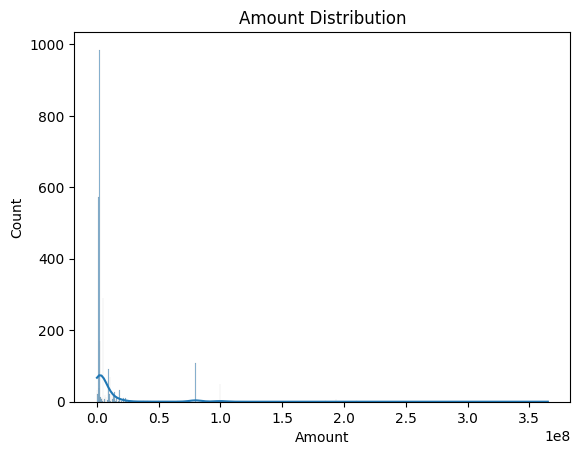

In [56]:
sns.histplot(df['Amount'], kde=True)
plt.title('Amount Distribution')
plt.show()

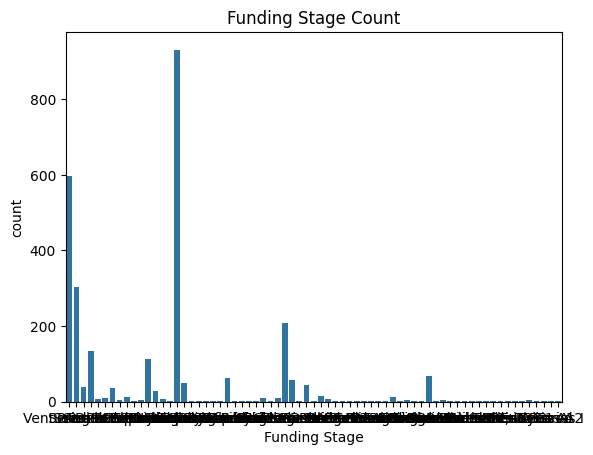

In [63]:
sns.countplot(x='Funding Stage', data=df)
plt.title('Funding Stage Count')
plt.show()

#### Bivariate Analysis

#### Multivariate Analysis

#### Correlation Matrix and Heatmap

#### Outlier Detection

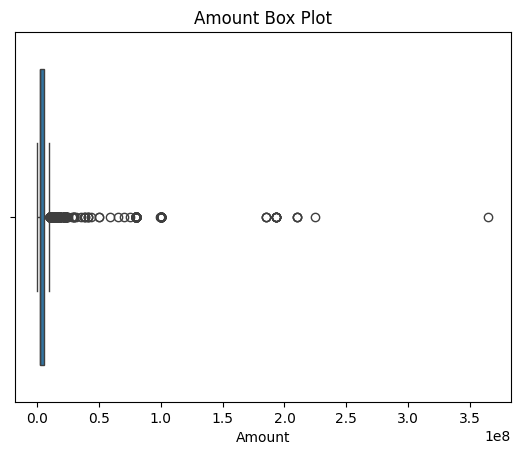

In [70]:
sns.boxplot(x='Amount', data=df)
plt.title('Amount Box Plot')
plt.show()

In [71]:
# Identify outliers within the Amount column (using IQR)
KQ1 = df['Amount'].quantile(0.25)  # Calculate 1st quartile of 'Amount'
KQ3 = df['Amount'].quantile(0.75)  # Calculate 3rd quartile of 'Amount'
KIQR = KQ3 - KQ1  # Calculate Interquartile Range

# Identify outliers using IQR
outliersk = df[(df['Amount'] < (KQ1 - 1.5 * KIQR)) | (df['Amount'] > (KQ3 + 1.5 * KIQR))]
print(f"Number of outliers: {len(outliersk)}")

Number of outliers: 495
